In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict 
import sys
import os
import matplotlib.pyplot as plt
import _thread as thread
from tabulate import tabulate
import threading
import time

In [47]:
# ADDR = './401part.csv'

# file name below also in os delete command
ADDR_LIST = [
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/510.parest_r/510.parest_r.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/511.povray_r/511.povray_r.pinatrace.csv',
             '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/526.blender_r/526.blender_r.pinatrace.csv',
             '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/600.perlbench_s/600.perlbench_s.pinatrace.csv',
             '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/602.gcc_s/602.gcc_s.pinatrace.csv',
#             '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/605.mcf_s/605.mcf_s.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/620.omnetpp_s/620.omnetpp_s.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/623.xalancbmk_s/623.xalancbmk_s.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/625.x264_s/625.x264_s.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/631.deepsjeng_s/631.deepsjeng_s.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/641.leela_s/641.leela_s.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/648.exchange2_s/648.exchange2_s.pinatrace.csv',
            '/nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/657.xz_s/657.xz_s.pinatrace.csv'
            ]
# ADDR = '/nfs_home/SPEC_2006/400.perlbench/400.perlbench.pinatrace.csv'
final_ADDR = '/nfs_home/nbhardwaj/data/SPEC_final/'
addr_l = [
    510
    , 511, 526,
           600, 602,  
    620,623, 625, 631, 641, 648, 657
         ]
# df = pd.read_csv(ADDR, skiprows = [0], nrows = 10000)

In [49]:
for a, b in zip(addr_l, ADDR_LIST):
    print(a, b)
    print("")

510 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/510.parest_r/510.parest_r.pinatrace.csv

511 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/511.povray_r/511.povray_r.pinatrace.csv

526 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/526.blender_r/526.blender_r.pinatrace.csv

600 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/600.perlbench_s/600.perlbench_s.pinatrace.csv

602 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/602.gcc_s/602.gcc_s.pinatrace.csv

620 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/620.omnetpp_s/620.omnetpp_s.pinatrace.csv

623 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/623.xalancbmk_s/623.xalancbmk_s.pinatrace.csv

625 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/625.x264_s/625.x264_s.pinatrace.csv

631 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/631.deepsjeng_s/631.deepsjeng_s.pinatrace.csv

641 /nfs_home/matkade/pinplay/Pintool/SPEC_2017_ST_First_run/641.leela

In [54]:
m2 = {}
for addr, ADDR in zip(addr_l, ADDR_LIST):
    df = pd.read_csv(ADDR, skiprows = [0], usecols = ['Data'], nrows = 100000)
    df['Data_int'] = df.Data.apply(lambda x:int(x, 16)//64)
    df['next_data'] = df.Data_int.shift(periods = -1)
    m = {}
    tot=0
    for x in range(len(df)):
        dat = df.loc[x].Data_int
        next_dat = df.loc[x].next_data
        if(m.get(dat)!=None and m[dat]==next_dat):
            tot+=1
        else:
            m[dat] = next_dat
    m2[addr] = ((tot*100)/len(df))
    

In [55]:
m2

{510: 49.744,
 511: 31.387,
 526: 33.296,
 600: 26.175,
 602: 37.532,
 620: 30.614,
 623: 39.792,
 625: 62.737,
 631: 32.489,
 641: 29.415,
 648: 22.814,
 657: 36.021}

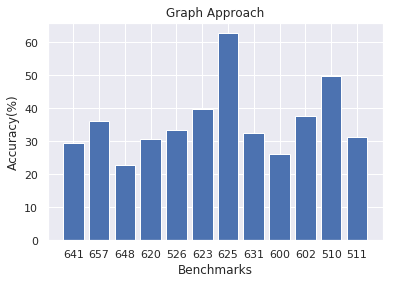

In [60]:
import seaborn as sns
sns.set()
plt.bar(range(len(m2)), list(m2.values()), align = 'center')
plt.xticks(range(len(m2)), list(m2.keys()))
plt.xlabel('Benchmarks')
plt.ylabel('Accuracy(%)')
plt.title('Graph Approach (100K values)')
plt.show()

